In [63]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import json

In [64]:
dataset='PA100k'
lrEpochDecay = 8
reportedGithubValueF1=0.874
pathToTestingOverall = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/PA100k/testing_metrics.json'
pathToTrainingOverall =  '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/PA100k/training_metrics.json'

In [65]:
fileTestingOverall = open(pathToTestingOverall)
jsonTestingOverall = json.load(fileTestingOverall)

fileTrainingOverall = open(pathToTrainingOverall)
jsonTrainingOverall = json.load(fileTrainingOverall)

In [66]:
f1Key='f1'
listF1Testing = jsonTestingOverall['f1']
listF1Training = jsonTrainingOverall['f1']


In [67]:
def plotTrainingVsTesting(listTraining, listTesting, tittle, lrDecay, reportedValue):
    epochs=len(listTraining)
    plt.plot(range(0,epochs), listTraining, label='training F1')
    plt.plot(range(0,epochs), listTesting, label='training F1')

    plt.plot(lrDecay, listTraining[lrDecay], 'o', color='r', label='learning decay epoch - '+str(lrDecay))
    plt.text(s=str(round(listTraining[lrDecay],2)), x=lrDecay, y=listTraining[lrDecay])
    
    plt.plot(lrDecay, listTesting[lrDecay], 'o', color='r')
    plt.text(s=str(round(listTesting[lrDecay],2)), x=lrDecay, y=listTesting[lrDecay])

    plt.plot(lrDecay, reportedValue, 'x', color='g', label='reported value')
    plt.text(s=str(reportedValue)+' github value', x=lrDecay, y=reportedValue-0.01)

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(bbox_to_anchor=(1.1, 1.05), title=tittle, fontsize='small', fancybox=True)
    plt.show()

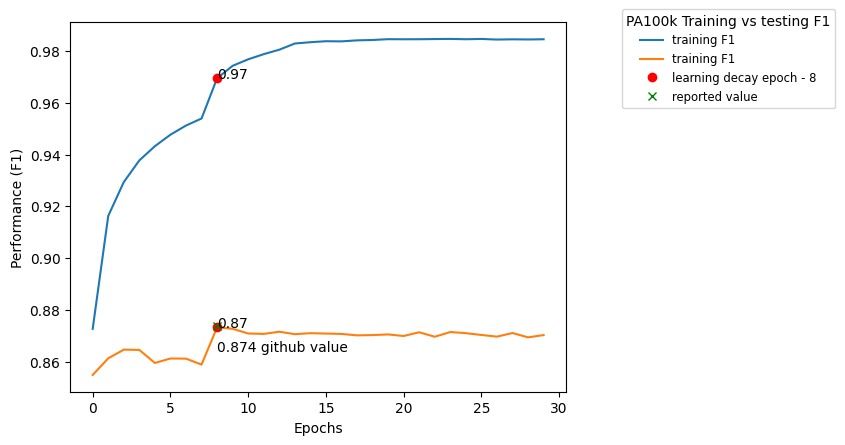

In [68]:
tittle=dataset+' Training vs testing F1'
plotTrainingVsTesting(listF1Training, listF1Testing, tittle, lrEpochDecay, reportedGithubValueF1)

In [69]:
pathToTestingLabels = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+dataset+'/testing_metrics_labels.json'
pathToTrainingLabels =  '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+dataset+'/training_metrics_labels.json'

fileTestingLabels = open(pathToTestingLabels)
jsonTestingLabels = json.load(fileTestingLabels)

fileTrainingLabels = open(pathToTrainingLabels)
jsonTrainingLabels = json.load(fileTrainingLabels)

def SortByPerformanceBestStep(sub_li, step):
    return(sorted(sub_li, key=lambda x: x[step], reverse =True))

f1Key='f1'
listTestingLabelsKeys = [key for key,value in jsonTestingLabels.items() if key.startswith(f1Key)]
listTestingLabelsPerformance = [value for key,value in jsonTestingLabels.items() if key.startswith(f1Key)]

listTestingLabelsPerformance=SortByPerformanceBestStep(listTestingLabelsPerformance, lrEpochDecay)

listTrainingLabelsKeys = [key for key,value in jsonTrainingLabels.items() if key.startswith(f1Key)]
listTrainingLabelsPerformance = [value for key,value in jsonTrainingLabels.items() if key.startswith(f1Key)]

listTrainingLabelsPerformance=SortByPerformanceBestStep(listTrainingLabelsPerformance, lrEpochDecay)

medium = 0.4
good = 0.85
step = lrEpochDecay

def plotAttributesJson(listAttr, listPerformance, tittle,step):
    epochs=len(listPerformance[0])
    valuesX = range(0,epochs)

    classes = []
    for attribute, performance in zip(listAttr, listPerformance):
        valuesY = performance
        classes.append( attribute + " - {:.2f}".format(performance[step]))
        plt.plot(valuesX, valuesY)

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, ncol=3, fontsize='small', fancybox=True)
    plt.show()

def plotAttributesJsonInterval(listAttr, listPerformance, tittle, step, floor, ceil):
    epochs=len(listPerformance[0])
    valuesX = range(0,epochs)

    classes = []
    for attribute, performance in zip(listAttr, listPerformance):
        valuesY = performance
        if valuesY[step] >=floor and valuesY[step]<ceil:
            classes.append( attribute + " - {:.2f}".format(performance[step]))
            plt.plot(valuesX, valuesY)

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, ncol=2, fontsize='small', fancybox=True)
    plt.show()

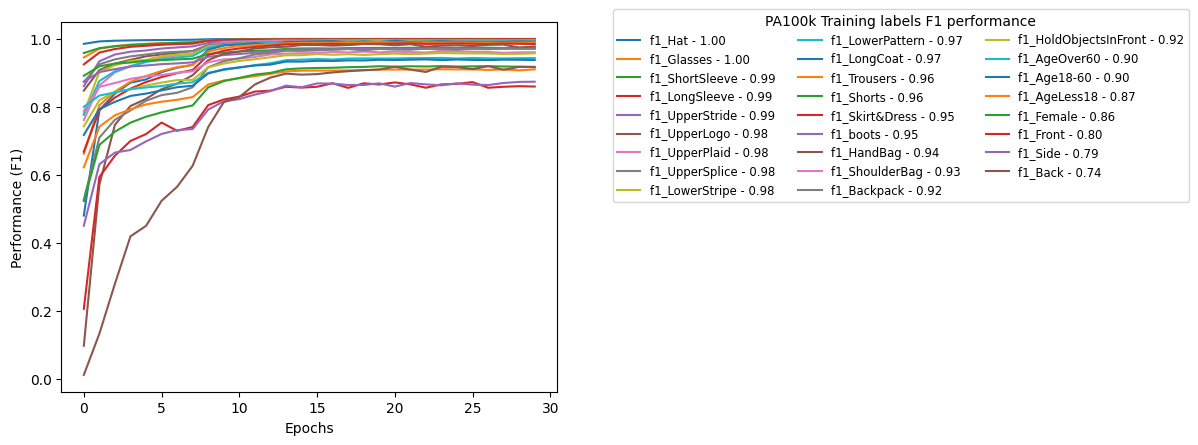

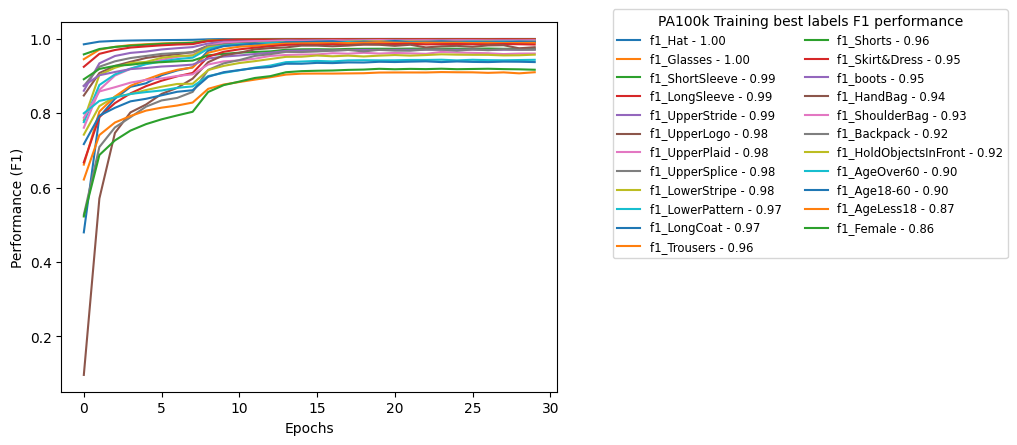

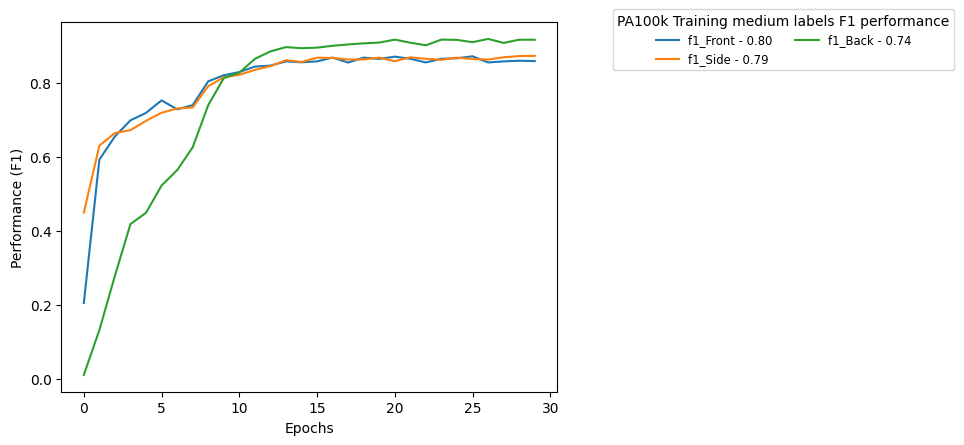

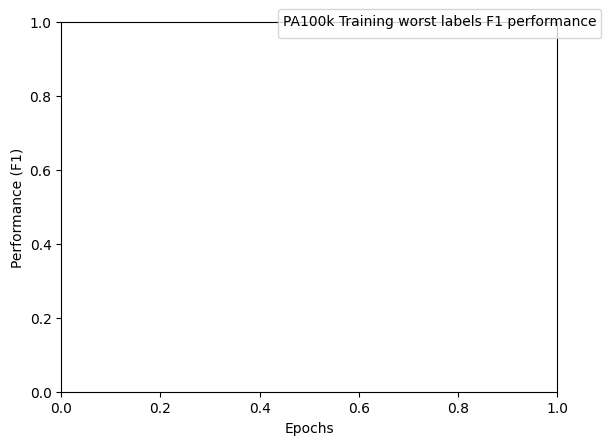

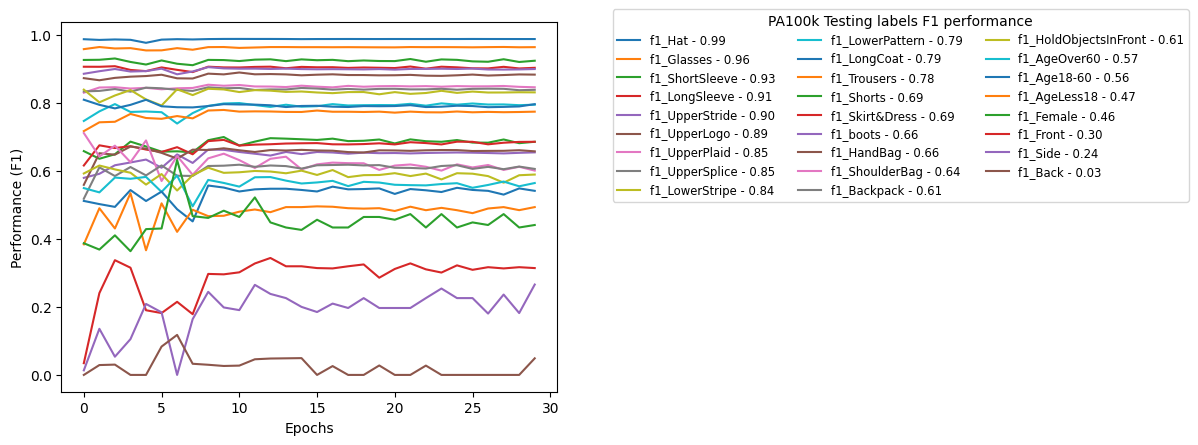

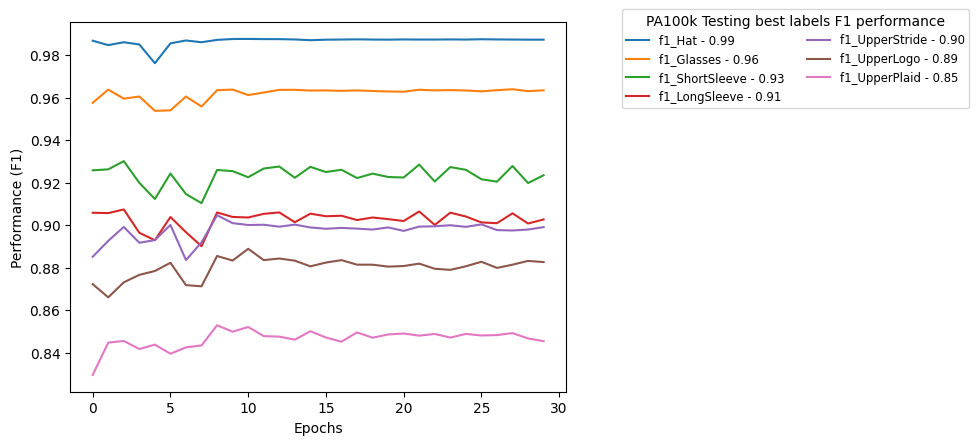

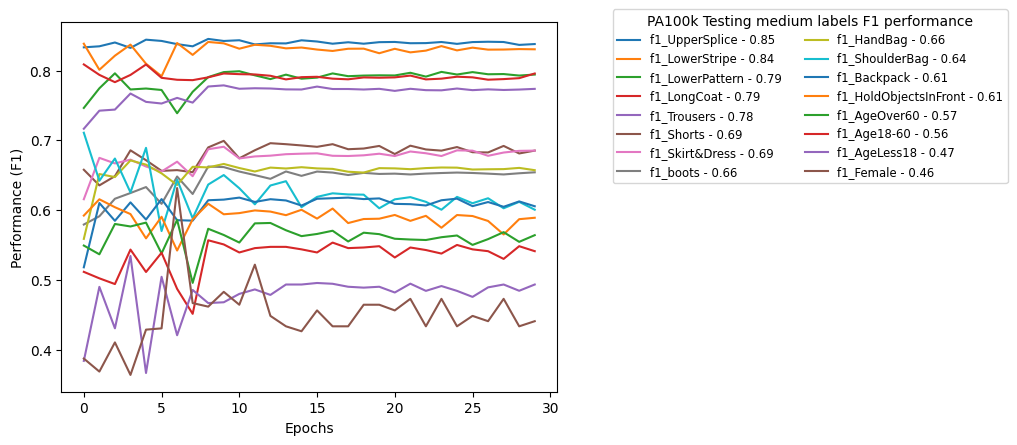

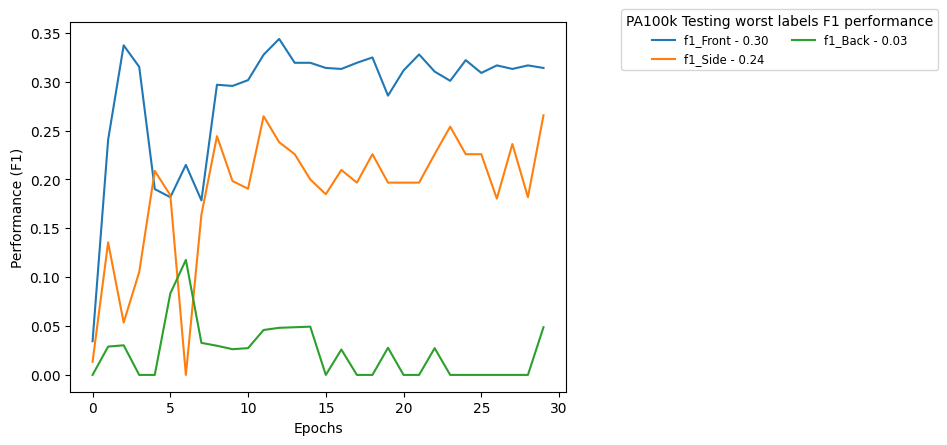

In [70]:
tittle=dataset+" Training labels F1 performance"
plotAttributesJson(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step)

tittle=dataset+" Training best labels F1 performance"
plotAttributesJsonInterval(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step, floor=good, ceil=1)
tittle=dataset+" Training medium labels F1 performance"
plotAttributesJsonInterval(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step, floor=medium, ceil=good)
tittle=dataset+" Training worst labels F1 performance"
plotAttributesJsonInterval(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step, floor=0, ceil=medium)

tittle=dataset+" Testing labels F1 performance"
plotAttributesJson(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step)

tittle=dataset+" Testing best labels F1 performance"
plotAttributesJsonInterval(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step, floor=good, ceil=1)
tittle=dataset+" Testing medium labels F1 performance"
plotAttributesJsonInterval(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step, floor=medium, ceil=good)
tittle=dataset+" Testing worst labels F1 performance"
plotAttributesJsonInterval(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step, floor=0, ceil=medium)

In [2]:
pathToF1Test = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/PA100k/PA100k_testing_f1.csv'

pathToF1Ttraining = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/PA100k/PA100k_training_f1.csv'

In [13]:
training_dt_f1 = pd.read_csv(pathToF1Ttraining, sep=',', index_col=False)
test_dt_f1 = pd.read_csv(pathToF1Test, sep=',', index_col=False)

NameError: name 'pathToF1Ttraining' is not defined

In [4]:
medium = 0.4
good = 0.85
step = 8

In [5]:
#training_dt_f1 = training_dt_f1.sort_values(by='value', ascending=True)
#test_dt_f1 = test_dt_f1.sort_values(by='value', ascending=True)

In [6]:
intervalBadTraining = training_dt_f1[(training_dt_f1['value'] <= medium) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listBadAttributesTraining = list(intervalBadTraining['key'])
listBadAttributesTraining.remove('learning_rate_605')
listBadAttributesTrainingPerformance = list(intervalBadTraining['value'])

intervalMediumTraining = training_dt_f1[(training_dt_f1['value'] > medium) & (training_dt_f1['value'] <= good) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listMediumAttributesTraining = list(intervalMediumTraining['key'])
listMediumAttributesTrainingPerformance = list(intervalMediumTraining['value'])


intervalGoodTraining = training_dt_f1[(training_dt_f1['value'] > good) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listGoodAttributesTraining = list(intervalGoodTraining['key'])
listGoodAttributesTrainingPerformance = list(intervalGoodTraining['value'])

In [7]:
def plotAttributes(listAttr, ds, listPerformance, tittle):
    for attribute in listAttr:
        valuesX = list(ds[ds['key'] == attribute]['value'])
        valuesY = list(ds[ds['key'] == attribute]['step'])
        plt.plot(valuesY, valuesX)
    
    classes = []
    for attrib, performance in zip(listAttr, listPerformance):
        classes.append( attrib + " - {:.2f}".format(performance))

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, fontsize='small', fancybox=True)
    plt.show()

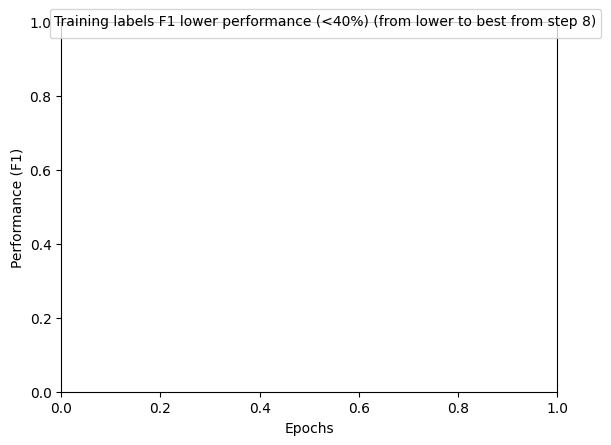

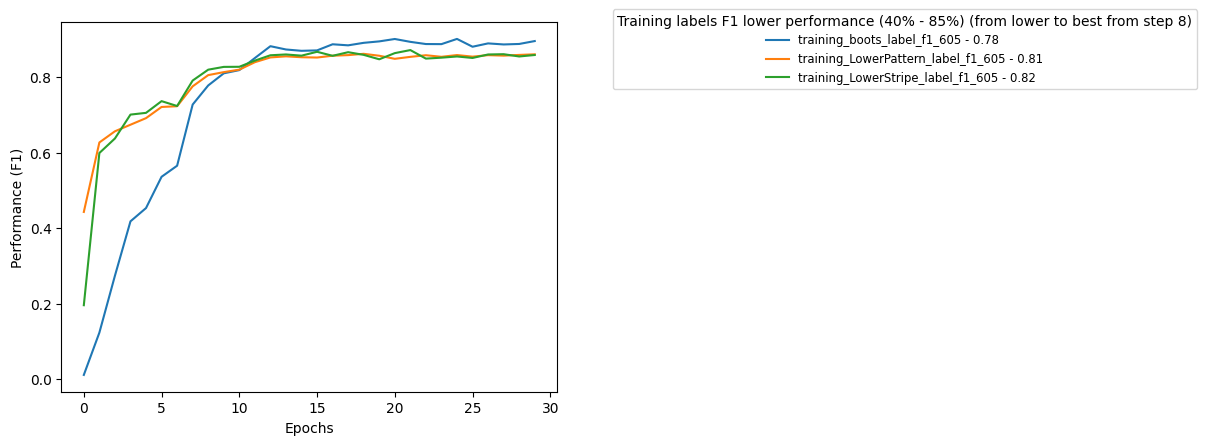

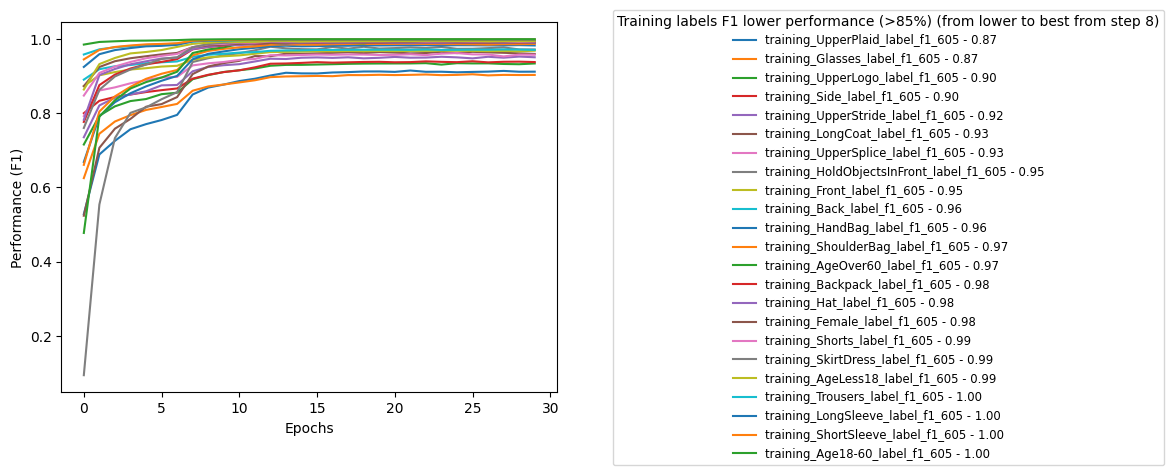

In [8]:
plotAttributes(listBadAttributesTraining, training_dt_f1, listBadAttributesTrainingPerformance, "Training labels F1 lower performance (<40%) (from lower to best from step {})".format(step))
plotAttributes(listMediumAttributesTraining, training_dt_f1, listMediumAttributesTrainingPerformance, "Training labels F1 lower performance (40% - 85%) (from lower to best from step {})".format(step))
plotAttributes(listGoodAttributesTraining, training_dt_f1, listGoodAttributesTrainingPerformance, "Training labels F1 lower performance (>85%) (from lower to best from step {})".format(step))

In [9]:
intervalBadTesting = test_dt_f1[(test_dt_f1['value'] <= medium) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listBadAttributesTesting = list(intervalBadTesting['key'])
listBadAttributesTesting.remove('learning_rate_605')
listBadAttributesTestingPerformance = list(intervalBadTesting['value'])

intervalMediumTesting = test_dt_f1[(test_dt_f1['value'] > medium) & (test_dt_f1['value'] <= good) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listMediumAttributesTesting = list(intervalMediumTesting['key'])
listMediumAttributesTestingPerformance = list(intervalMediumTesting['value'])

intervalGoodTesting = test_dt_f1[(test_dt_f1['value'] > good) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listGoodAttributesTesting = list(intervalGoodTesting['key'])
listGoodAttributesTestingPerformance = list(intervalGoodTesting['value'])

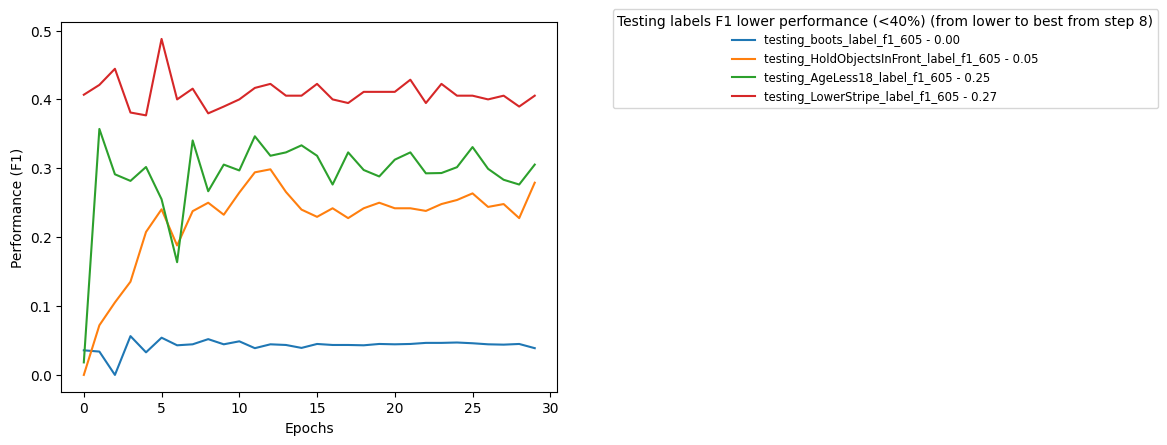

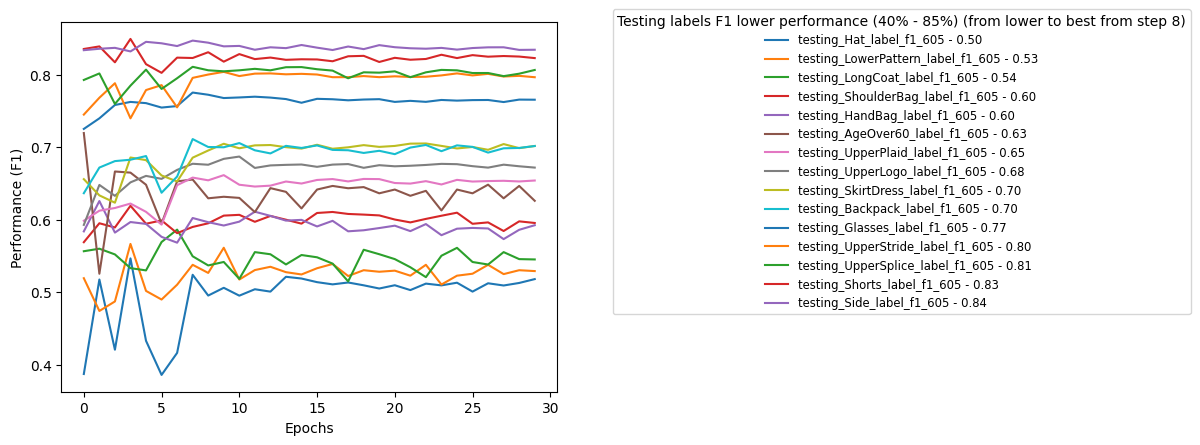

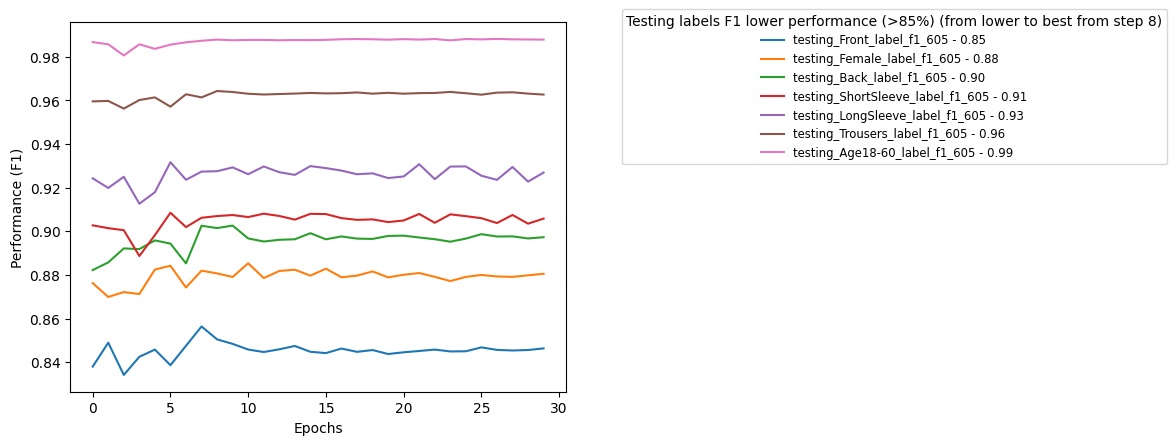

In [10]:
plotAttributes(listBadAttributesTesting, test_dt_f1, listBadAttributesTestingPerformance, "Testing labels F1 lower performance (<40%) (from lower to best from step {})".format(step))
plotAttributes(listMediumAttributesTesting, test_dt_f1, listMediumAttributesTestingPerformance, "Testing labels F1 lower performance (40% - 85%) (from lower to best from step {})".format(step))
plotAttributes(listGoodAttributesTesting, test_dt_f1, listGoodAttributesTestingPerformance, "Testing labels F1 lower performance (>85%) (from lower to best from step {})".format(step))

In [11]:
listAttributesPA100k= ['Hat','Glasses','ShortSleeve','LongSleeve','UpperStride','UpperLogo','UpperPlaid','UpperSplice','LowerStripe','LowerPattern','LongCoat','Trousers','Shorts','SkirtDress','boots', 'HandBag','ShoulderBag','Backpack','HoldObjectsInFront','AgeOver60','Age18-60','AgeLess18','Female','Front','Side','Back']
listAttributesRAPzs = listAttributesPA100k

In [12]:
tablaBadTesting = pd.DataFrame()
listBadAttributesTestingPerformance.remove(listBadAttributesTestingPerformance[0])
tablaBadTesting['attributes'] = listBadAttributesTesting
tablaBadTesting['performance'] = listBadAttributesTestingPerformance
tablaMediumTesting = pd.DataFrame()
tablaMediumTesting['attributes'] = listMediumAttributesTesting
tablaMediumTesting['performance'] = listMediumAttributesTestingPerformance
tablaGoodTesting = pd.DataFrame()
tablaGoodTesting['attributes'] = listGoodAttributesTesting
tablaGoodTesting['performance'] = listGoodAttributesTestingPerformance

tablaBadTraining = pd.DataFrame()
listBadAttributesTrainingPerformance.remove(listBadAttributesTrainingPerformance[0])
tablaBadTraining['attributes'] = listBadAttributesTraining
tablaBadTraining['performance'] = listBadAttributesTrainingPerformance

tablaMediumTraining = pd.DataFrame()
tablaMediumTraining['attributes'] = listMediumAttributesTraining
tablaMediumTraining['performance'] = listMediumAttributesTrainingPerformance

tablaGoodTraining = pd.DataFrame()
tablaGoodTraining['attributes'] = listGoodAttributesTraining
tablaGoodTraining['performance'] = listGoodAttributesTrainingPerformance

listPerfoTraining=[]
listPerfoTesting=[]
for attributeReal in listAttributesRAPzs:
    
    for attributeTraining in listBadAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listBadAttributesTrainingPerformance[listBadAttributesTraining.index(attributeTraining)]
    
    for attributeTraining in listMediumAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listMediumAttributesTrainingPerformance[listMediumAttributesTraining.index(attributeTraining)]
    
    for attributeTraining in listGoodAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listGoodAttributesTrainingPerformance[listGoodAttributesTraining.index(attributeTraining)]

    for attributeTesting in listBadAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listBadAttributesTestingPerformance[listBadAttributesTesting.index(attributeTesting)]
    
    for attributeTesting in listMediumAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listMediumAttributesTestingPerformance[listMediumAttributesTesting.index(attributeTesting)]
    
    for attributeTesting in listGoodAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listGoodAttributesTestingPerformance[listGoodAttributesTesting.index(attributeTesting)]
    
    listPerfoTraining.append(perfoTraining)
    listPerfoTesting.append(perfoTesting)



tablaAll = pd.DataFrame({'attribute': listAttributesRAPzs,
     'perfo training (F1)': listPerfoTraining,
     'perfo testing (F1)': listPerfoTesting
    })

In [13]:
pathToAppearsTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/PA100k/PA100k_test.csv'
pathToAppearsTrain = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/PA100k/PA100k_train.csv'


train_dt = pd.read_csv(pathToAppearsTrain, sep='\t', index_col=False)

test_dt = pd.read_csv(pathToAppearsTest, sep='\t', index_col=False)

listTrainingCount = []
listTestingCount = []
for attribute in tablaAll.attribute.unique():
    if attribute == 'SkirtDress':
        listTrainingCount.append(train_dt['Skirt&Dress'].sum())
        listTestingCount.append(test_dt['Skirt&Dress'].sum())
    else:
        listTrainingCount.append(train_dt[attribute].sum())
        listTestingCount.append(test_dt[attribute].sum())

tablaAll['training count'] = listTrainingCount
tablaAll['testing count'] = listTestingCount

In [14]:
tablaAll.sort_values(by='perfo testing (F1)')

,attribute,perfo training (F1),perfo testing (F1),training count,testing count
14,boots,0.777889,0.051948,495,55
18,HoldObjectsInFront,0.948379,0.250000,771,101
21,AgeLess18,0.990215,0.266667,4152,92
8,LowerStripe,0.819672,0.379747,404,25
0,Hat,0.979180,0.495690,3516,287
9,LowerPattern,0.805261,0.526882,1421,119
10,LongCoat,0.926039,0.537201,2256,448
16,ShoulderBag,0.967991,0.595272,15290,1955
15,HandBag,0.960273,0.596798,14680,1465
19,AgeOver60,0.972002,0.629723,1127,258


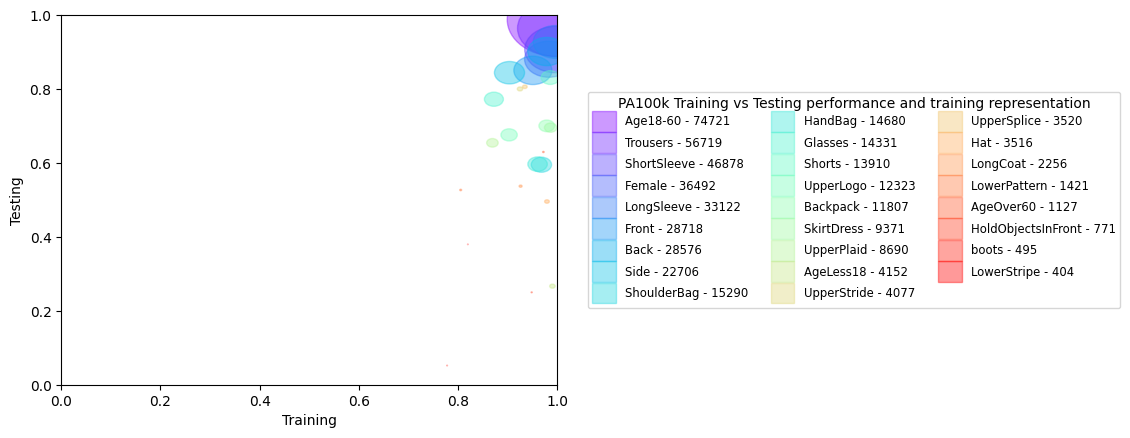

In [58]:
max=tablaAll['training count'].max()

division = 0.1 / max

import numpy as np
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, tablaAll['training count'].count())))



circlesList = []
for attribute in tablaAll.sort_values(by='training count', axis=0, ascending=False)['attribute']:
    x=tablaAll[tablaAll['attribute']==attribute]['perfo training (F1)']
    y=tablaAll[tablaAll['attribute']==attribute]['perfo testing (F1)']
    count = tablaAll[tablaAll['attribute']==attribute]['training count']
    newAttribute = attribute + ' - ' + str(int(count))
    count = division * count
    c = next(color)
    circle = plt.Circle((x, y), count, color=c, alpha=0.4, label=newAttribute)
    circlesList.append(circle)


for circle in circlesList:
    plt.gca().add_patch(circle)

tittle='PA100k Training vs Testing performance and training representation'
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title=tittle, fontsize='small', fancybox=True, ncol=3,handleheight=2.4, labelspacing=0.05)
plt.xlabel('Training')
plt.ylabel('Testing')
plt.show()